In [102]:
import numpy as np
import h5py
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline


In [106]:
# Here we run a function that extracts the dataset from a h5py file   
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [107]:
# this is to load the dataset we have.classes is the class of either cat or non cat
# note that the images are not preprocessed
train_X, train_Y, test_X, test_Y, classes = load_dataset()
print("shape of training set X is : " + str(train_X.shape))
print("shape of training set Y is : " + str(train_Y.shape))
print("shape of classes + " + str(classes.shape))

shape of training set X is : (209, 64, 64, 3)
shape of training set Y is : (1, 209)
shape of classes + (2,)


y = [1], it's a 'cat' picture.


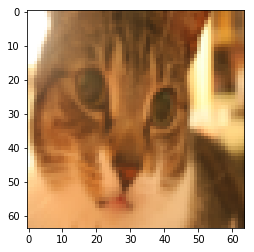

In [108]:
#Visualizing the images
index = 200
plt.imshow(train_X[index])
print ("y = " + str(train_Y[:, index]) + ", it's a '" + classes[np.squeeze(train_Y[:, index])].decode("utf-8") +  "' picture.")


In [109]:
#lets see the shapes of our data
m_train = train_X.shape[0]
m_test = test_X.shape[0]
num_pix = train_X.shape[1]
print(m_train)
print(m_test)
print(num_pix)

209
50
64


In [110]:
#Now we need to flatten or reshape our data
train_X_flat = train_X.reshape(m_train, -1).T
test_X_flat = test_X.reshape(m_test, -1).T
train_X_flat.shape
print ("sanity check after reshaping: " + str(train_X_flat[0:5,0]))
#THis can be very confusing. if you try to just interchange the dimensions and not transpose, it gives a wired result
# (lesson)I think its best to use the row dimension and -1 for the column 

sanity check after reshaping: [17 31 56 22 33]


In [111]:
# standardize the dataset
trainX = train_X_flat / 255
testX = test_X_flat / 255
testX.shape

(12288, 50)

## Building the model

In [126]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

def segmoid_derivative(x):
    s = vector_sig(x)
    ds = s * (1 - (s))
    return ds

def init_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

def propagate(w, b, X, Y):
    m = X.shape[1]
    #forward prop
    A = sigmoid(np.dot(w.T, X) + b) #or A = sigmoid(np.dot(w.T, X) + b)
    
    cost = (1/m) * np.sum(-(Y * np.log(A) + (1 - Y)* np.log(1 - A)))
    #Backprop
    dw = (1/m) * (np.dot(X, (A - Y).T)) 
#     v =  A * (1 - A)
#     c = (-Y / A) + ((1 - Y) / A)
#     dw = (1 / m) * np.dot(v, c.T)
    db = (1/m) * (np.sum(A - Y))
    grads = {"dw": dw, "db":db}
    
    return grads, cost

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range (num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if (i %100 == 0):
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print("cost after iteration %i : %f" %(i, cost))
    params = {"w": w, "b": b}
    grads = {"dw":dw, "db":db}
    
    return params, grads, costs
    
#now the predict function
def predict(w, b, X):
    m = X.shape[1]
    prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
            prediction[0, i] = 1
    else:
        prediction[0, i] = 0
   
    return prediction
    
    

In [127]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])

In [128]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

w = [[ 0.19033591]
 [ 0.12259159]]
b = 1.92535983008
dw = [[ 0.67752042]
 [ 1.41625495]]
db = 0.219194504541
dw = [[ 0.99845601]
 [ 2.39507239]]
db = 0.00145557813678
cost = 5.80154531939


In [129]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[ 1.  1.  0.]]


In [130]:
#Merge all functions
def model(X_train, Y_train,X_test,Y_test, num_iterations= 2000, learning_rate = 0.5, print_cost = False):
    
    w, b = init_with_zeros(X_train.shape[0]) #returns the wieghts and b
    #returns the optimized parameters, grdient, costs
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost) 
    w = parameters["w"]
    b = parameters["b"]
    
    prediction_of_train = predict(w, b, X_train)
    prediction_of_test = predict(w, b,X_test )
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(prediction_of_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(prediction_of_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": prediction_of_test, 
         "Y_prediction_train" : prediction_of_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d
    
    

In [131]:
d = model(trainX, train_Y, testX, test_Y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

cost after iteration 0 : 0.693147
cost after iteration 100 : 0.584508
cost after iteration 200 : 0.466949
cost after iteration 300 : 0.376007
cost after iteration 400 : 0.331463
cost after iteration 500 : 0.303273
cost after iteration 600 : 0.279880
cost after iteration 700 : 0.260042
cost after iteration 800 : 0.242941
cost after iteration 900 : 0.228004
cost after iteration 1000 : 0.214820
cost after iteration 1100 : 0.203078
cost after iteration 1200 : 0.192544
cost after iteration 1300 : 0.183033
cost after iteration 1400 : 0.174399
cost after iteration 1500 : 0.166521
cost after iteration 1600 : 0.159305
cost after iteration 1700 : 0.152667
cost after iteration 1800 : 0.146542
cost after iteration 1900 : 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


In [116]:
# Example of a picture that was wrongly classified.


In [117]:
d["Y_prediction_test"].shape

(1, 50)

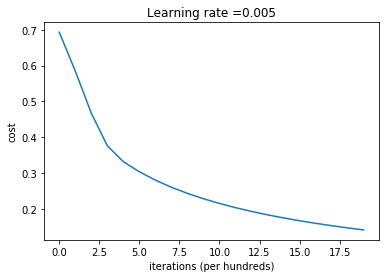

In [118]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



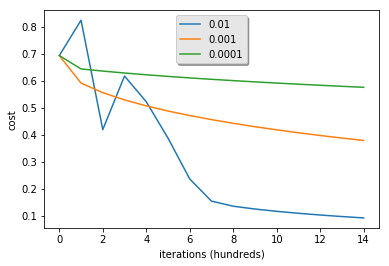

In [119]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(trainX, train_Y, testX, test_Y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

y = 0.0, your algorithm predicts a "non-cat" picture.


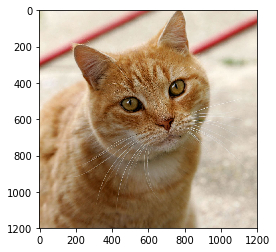

In [101]:
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "Cat03.jpg"   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.
fname = my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")